# Joining Processed Data

This section joins data processed from data_extraction.ipynb and returns numpy representation of pandas dfs compatible with sklearn. 

NA values in df1 and df2 are filled with medians of their respective columns (may be testing other options like cosine similarity for missing data).

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
demos = pd.read_csv("demos_clean.csv")
demos.drop(demos.columns[[0]], axis=1, inplace=True)
all_achi = pd.read_csv("all_achi.csv")
all_achi.drop(all_achi.columns[[0]], axis=1, inplace=True)

In [4]:
df1 = pd.merge(demos, all_achi, on='school_id', how='inner')
df1 = df1.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
for i in range(len(df1.columns)):
    df1.iloc[:, i] = df1.iloc[:, i].fillna(df1.iloc[:, i].median(skipna=True))

In [5]:
grad = pd.read_csv("grad_clean.csv")
grad.drop(grad.columns[[0]], axis=1, inplace=True)
financials = pd.read_csv("financials_clean.csv")
financials.drop(financials.columns[[0]], axis=1, inplace=True)

In [6]:
df2 = pd.merge(demos, grad, on='school_id', how='inner')
df2 = pd.merge(df2, financials, on='district_id', how='inner')
df2 = pd.merge(df2, all_achi, on='school_id', how='inner')

In [7]:
#drop attributes used for data processing
df2 = df2.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
#drop attributes that were pulled, but not predictive
df2 = df2.drop(columns=['total_rev', 'total_locrev', 'pta_rev', 'prop_taxes', 'sales_taxes', 'public_utility_taxes', 'income_taxes', 'other_taxes'])
df2.total_salaries = df2.total_salaries/df2.total
df2.salaries_instruction = df2.salaries_instruction/df2.total
df2.salaries_teachers = df2.salaries_teachers/df2.total
df2 = df2.rename(columns={'total_salaries': 'total_salaries_ps', 'salaries_instruction': 'salaries_instruction_ps', 'salaries_teachers': 'salaries_teachers_ps'})
for i in range(len(df2.columns)):
    df2.iloc[:, i] = df2.iloc[:, i].fillna(df2.iloc[:, i].median(skipna=True))

# Linear Regression

## DF1 Features

In [434]:
data = df1.values

In [435]:
features = data[:, 0:10]
labels = data[:, 10]

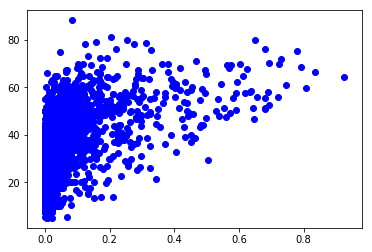

In [436]:
plt.scatter(features[:, 1], labels, color='blue')

In [437]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [438]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [439]:
model = lr.fit(train, train_labels)

In [440]:
score = model.score(test, test_labels)
print(score)

0.2632369514976287


## DF2 Features

In [441]:
data_add = df2.values

In [442]:
features_add = data_add[:, 0:20]
labels_add = data_add[:, 20]

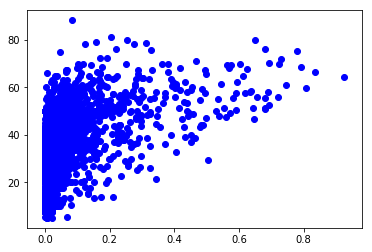

In [443]:
plt.scatter(features_add[:, 1], labels_add, color='blue')

In [444]:
train_add, test_add, train_labels_add, test_labels_add = train_test_split(features_add, labels_add, test_size = 0.2)

In [445]:
lr_add = LinearRegression(normalize=True)

In [446]:
model_add = lr_add.fit(train_add, train_labels_add)

In [447]:
score_add = model_add.score(test_add, test_labels_add)
print(score_add)

0.3919797472513169


# Multi-Class Classification

In [448]:
print('max:', df2['agg_achi'].max())
print('min: ', df2['agg_achi'].min())

max: 88.33333333333331
min:  5.0


# Ten Class

## DF1 Features

In [11]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df1['agg_achc'] = pd.cut(df1.agg_achi, bins, labels = names, right = False)

In [450]:
ten_class_achidf1 = df1.values

In [451]:
mc_features = ten_class_achidf1[:, 0:10]
mc_labels = ten_class_achidf1[:, 11]

In [452]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [453]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [454]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [455]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.33229813664596275


## DF2 Features

In [547]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df2['agg_achc'] = pd.cut(df2.agg_achi, bins, labels = names, right = False)

In [548]:
ten_class_achidf2 = df2.values

In [549]:
mc_features_add = ten_class_achidf2[:, 0:20]
mc_labels_add = ten_class_achidf2[:, 21]

In [550]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [551]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [552]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [553]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.25117739403453687


## Random/Majority Class

In [463]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[80-90), [70-80), [40-50), [40-50), [20-30), ..., [70-80), [50-60), [30-40), [60-70), [0-10)]
Length: 637
Categories (10, object): [[0-10) < [10-20) < [20-30) < [30-40) ... [60-70) < [70-80) < [80-90) < [90-100]]


In [464]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.10518053375196232


In [465]:
ten_class_achilabels = pd.DataFrame(mc_train_labels_add)

In [466]:
ten_class_achilabels.iloc[:, 0].value_counts()

[30-40)    615
[40-50)    547
[20-30)    526
[50-60)    517
[10-20)    209
[60-70)     70
[0-10)      40
[70-80)     17
[80-90)      3
Name: 0, dtype: int64

In [467]:
common_labels = np.repeat('[30-40)', len(mc_test_labels_add))

In [468]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.23547880690737832


# Four Class

## DF1 Features

In [469]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df1['agg_achc'] = pd.cut(df1.agg_achi, bins, labels = names, right = False)

In [470]:
four_class_achidf1 = df1.values

In [471]:
mc_features = four_class_achidf1[:, 0:10]
mc_labels = four_class_achidf1[:, 11]

In [472]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [473]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [474]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [475]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.5869565217391305


## DF2 Features

In [476]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df2['agg_achc'] = pd.cut(df2.agg_achi, bins, labels = names, right = False)

In [477]:
four_class_achidf2 = df2.values

In [478]:
mc_features_add = four_class_achidf2[:, 0:20]
mc_labels_add = four_class_achidf2[:, 21]

In [479]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [480]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [481]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [482]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.565149136577708


## Random/Majority Class

In [483]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[25-50), [0-25), [0-25), [25-50), [25-50), ..., [50-75), [50-75), [50-75), [75-100], [50-75)]
Length: 637
Categories (4, object): [[0-25) < [25-50) < [50-75) < [75-100]]


In [484]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.22919937205651492


In [485]:
four_class_achilabels = pd.DataFrame(mc_train_labels_add)

In [486]:
four_class_achilabels.iloc[:, 0].value_counts()

[25-50)     1411
[50-75)      592
[0-25)       528
[75-100]      13
Name: 0, dtype: int64

In [487]:
common_labels = np.repeat('[25-50)', len(mc_test_labels_add))

In [488]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.5667189952904239


# Multi-Class Classification (grad_rate)

In [489]:
grad.head()

,school_id,grad_rate_all,grad_rate_native,grad_rate_asian,grad_rate_black,grad_rate_hispanic,grad_rate_mixed,grad_rate_linc
0,1.000050e+10,93.0,NaN,NaN,NaN,90.0,NaN,NaN
1,1.000060e+10,90.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000060e+10,85.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000060e+10,90.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000060e+10,85.0,NaN,NaN,NaN,NaN,NaN,NaN


In [490]:
grad['agg_grad_rate'] = grad.iloc[:, 2:].mean(axis=1)

In [491]:
grad = grad[['school_id', 'agg_grad_rate']]

In [492]:
grad = grad.dropna(how='any')

In [493]:
grad.shape

(11810, 2)

# Ten Class

## DF3 Features

In [574]:
df3 = pd.merge(demos, grad, on='school_id', how='inner')
df3 = df3.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
for i in range(len(df3.columns)):
    df3.iloc[:, i] = df3.iloc[:, i].fillna(df3.iloc[:, i].median(skipna=True))

In [575]:
df3.head()

,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,free_lunch,reduced_lunch,total,agg_grad_rate
0,0.000000,0.072464,0.782609,0.043478,0.086957,0.000000,0.014493,0.521739,0.014493,69.0,20.000000
1,0.000000,0.006579,0.888158,0.032895,0.052632,0.006579,0.013158,0.776316,0.085526,152.0,72.500000
2,0.005691,0.053802,0.741852,0.028971,0.144853,0.005173,0.019659,0.443870,0.115882,1933.0,95.000000
3,0.006903,0.047455,0.885246,0.028473,0.026747,0.002783,0.005177,0.821398,0.099223,1159.0,75.000000
4,0.003980,0.231841,0.732338,0.012935,0.013930,0.002783,0.004975,0.817910,0.111443,1005.0,76.666667


In [576]:
print('max:', df3['agg_grad_rate'].max())
print('min: ', df3['agg_grad_rate'].min())

max: 98.0
min:  2.5


In [577]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df3['agg_grad_ratec'] = pd.cut(df3.agg_grad_rate, bins, labels = names, right = False)

In [578]:
ten_class_graddf3 = df3.values

In [579]:
mc_features = ten_class_graddf3[:, 0:10]
mc_labels = ten_class_graddf3[:, 11]

In [580]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [581]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [582]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [583]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.3625866050808314


## DF4 Features

In [504]:
df4 = pd.merge(demos, all_achi, on='school_id', how='inner')
df4 = pd.merge(df4, financials, on='district_id', how='inner')
df4 = pd.merge(df4, grad, on='school_id', how='inner')
#drop attributes used for data processing
df4 = df4.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
#drop attributes that were pulled, but not predictive
df4 = df4.drop(columns=['total_rev', 'total_locrev', 'pta_rev', 'prop_taxes', 'sales_taxes', 'public_utility_taxes', 'income_taxes', 'other_taxes'])
df4.total_salaries = df4.total_salaries/df4.total
df4.salaries_instruction = df4.salaries_instruction/df4.total
df4.salaries_teachers = df4.salaries_teachers/df4.total
df4 = df4.rename(columns={'total_salaries': 'total_salaries_ps', 'salaries_instruction': 'salaries_instruction_ps', 'salaries_teachers': 'salaries_teachers_ps'})
for i in range(len(df4.columns)):
    df4.iloc[:, i] = df4.iloc[:, i].fillna(df4.iloc[:, i].median(skipna=True))

In [505]:
df4.head()

,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,free_lunch,reduced_lunch,total,agg_achi,total_salaries_ps,salaries_instruction_ps,salaries_teachers_ps,agg_grad_rate
0,0.000000,0.072464,0.782609,0.043478,0.086957,0.000000,0.014493,0.521739,0.014493,69.0,35.0,1.887739e+06,1.212304e+06,911420.289855,20.0
1,0.002759,0.132414,0.700000,0.097931,0.042759,0.012414,0.011724,0.642759,0.099310,1450.0,51.5,8.983034e+04,5.768897e+04,43371.034483,90.0
2,0.000917,0.594495,0.241284,0.066972,0.064679,0.004587,0.027064,0.199083,0.087156,2180.0,62.2,5.974954e+04,3.837110e+04,28847.706422,93.5
3,0.002972,0.282318,0.459138,0.157999,0.071322,0.009411,0.016840,0.413571,0.119861,2019.0,47.5,6.451412e+04,4.143091e+04,31148.093115,96.0
4,0.012698,0.076190,0.717460,0.088889,0.088889,0.006349,0.009524,0.587302,0.053968,315.0,26.2,4.135048e+05,2.655524e+05,199644.444444,60.0


In [506]:
print('max:', df4['agg_grad_rate'].max())
print('min: ', df4['agg_grad_rate'].min())

max: 98.0
min:  2.5


In [507]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df4['agg_grad_ratec'] = pd.cut(df4.agg_grad_rate, bins, labels = names, right = False)

In [508]:
ten_class_graddf4 = df4.values

In [509]:
mc_features_add = ten_class_graddf4[:, 0:13]
mc_labels_add = ten_class_graddf4[:, 15]

In [510]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [511]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [512]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [513]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.29256594724220625


## Random/Majority Class

In [514]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[50-60), [0-10), [40-50), [20-30), [60-70), ..., [60-70), [80-90), [0-10), [60-70), [20-30)]
Length: 417
Categories (10, object): [[0-10) < [10-20) < [20-30) < [30-40) ... [60-70) < [70-80) < [80-90) < [90-100]]


In [515]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.07913669064748201


In [516]:
ten_class_achilabels = pd.DataFrame(mc_train_labels_add)

In [517]:
ten_class_achilabels.iloc[:, 0].value_counts()

[80-90)     548
[90-100]    395
[70-80)     218
[60-70)     156
[20-30)      92
[50-60)      78
[40-50)      74
[30-40)      55
[10-20)      42
[0-10)        9
Name: 0, dtype: int64

In [518]:
common_labels = np.repeat('[80-90)', len(mc_test_labels_add))

In [519]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.2973621103117506


# Four Class

## DF3 Features

In [520]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df3['agg_grad_ratec'] = pd.cut(df3.agg_grad_rate, bins, labels = names, right = False)

In [521]:
four_class_graddf3 = df3.values

In [522]:
mc_features = four_class_graddf3[:, 0:10]
mc_labels = four_class_graddf3[:, 11]

In [523]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [524]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [525]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [526]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.651270207852194


## DF4 Features

In [527]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df4['agg_grad_ratec'] = pd.cut(df4.agg_grad_rate, bins, labels = names, right = False)

In [528]:
four_class_graddf4 = df4.values

In [529]:
mc_features_add = four_class_graddf4[:, 0:13]
mc_labels_add = four_class_graddf4[:, 15]

In [530]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [531]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [532]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [533]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.6282973621103117


## Random/Majority Class

In [534]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[50-75), [75-100], [0-25), [0-25), [25-50), ..., [75-100], [25-50), [0-25), [50-75), [50-75)]
Length: 417
Categories (4, object): [[0-25) < [25-50) < [50-75) < [75-100]]


In [535]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.23501199040767387


In [536]:
four_class_achilabels = pd.DataFrame(mc_train_labels_add)

In [537]:
four_class_achilabels.iloc[:, 0].value_counts()

[75-100]    1058
[50-75)      327
[25-50)      165
[0-25)       117
Name: 0, dtype: int64

In [538]:
common_labels = np.repeat('[75-100]', len(mc_test_labels_add))

In [539]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.6115107913669064
